In [10]:
import sys
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
import pandas as pd

sys.path.append(str(pathlib.Path().absolute().parent))

from sim.house_simulator import House

%load_ext autoreload
%autoreload 2
%matplotlib inline

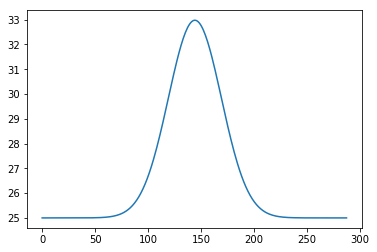

In [37]:
custom_t_out = norm.pdf(np.arange(0, 288, 1),144,25)*500+25
plt.plot(custom_t_out)

In [38]:
import requests
import json


def get_action(request_body={},port=5000):
    # General variables
    url = f"http://localhost:{port}"
    predictionPath = "/v1/prediction"
    headers = {
    "Content-Type": "application/json"
    }

    # Build the endpoint reference
    endpoint = url + predictionPath

    # Set the request variables
    

    # Send the POST request
    response = requests.post(
                endpoint,
                data = json.dumps(requestBody),
                headers = headers
            )

    # Extract the JSON response
    prediction = response.json()

    return prediction

In [39]:
house = House(K=0.5, C=0.3, Qhvac=9, Tin_initial=21)
timestep = 5
results = {'Tin':[], 'Tset':[], 'Tout': []}
for episode in range(1):
    house.setup_schedule(
        timestep=timestep,
        custom_t_out=custom_t_out.tolist(),
        schedule_index=2,
        t_set_day=21,
        t_set_night=21
        )

    for i in range(house.max_iterations):
        results['Tin'].append(house.Tin)
        results['Tset'].append(house.Tset)
        results['Tout'].append(house.Tout)
        requestBody = {"Tset": float(house.Tset),
            "Tout": float(house.Tout),
            "Tin": float(house.Tin),
            "total_power": 0.0,
            "T_forecast_1": house.T_forecast_1,
            "T_forecast_2": house.T_forecast_2,
            "T_forecast_3": house.T_forecast_3,
            "T_forecast_4": house.T_forecast_4,
            "T_forecast_5": house.T_forecast_5,

        }
        action = get_action(requestBody)['hvacON']
        house.update_hvacON(action)
        house.update_Tin()
        # print(f'Hour : {house.hours}', f'Minute : {house.minute}', f'Tout : {house.Tout}', f'Tin : {house.Tin}',
        #         f'HvacOn : {house.hvacON}', f'Tset : {house.Tset}', f'Total Power : {house.total_power}')

        # house.show()


RMSE: 1.1948886236769667


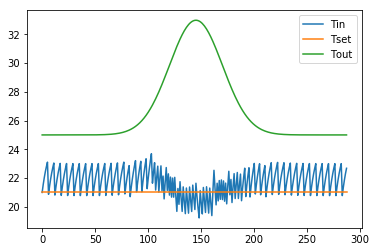

In [40]:
df_res_brain = pd.DataFrame(results)
df_res_brain.plot()
print('RMSE:', np.sqrt(np.sum(np.power(df_res_brain['Tin'].values-df_res_brain['Tset'].values,2))/df_res_brain.shape[0]))

In [41]:
house = House(K=0.5, C=0.3, Qhvac=9, Tin_initial=21)
timestep = 5
results = {'Tin':[], 'Tset':[], 'Tout': []}
for episode in range(1):
    house.setup_schedule(
        timestep=timestep,
        custom_t_out=custom_t_out.tolist(),
        schedule_index=2,
        t_set_day=21,
        t_set_night=21
        )

    for i in range(house.max_iterations):
        results['Tin'].append(house.Tin)
        results['Tset'].append(house.Tset)
        results['Tout'].append(house.Tout)
        requestBody = {"Tset": float(house.Tset),
            "Tout": float(house.Tout),
            "Tin": float(house.Tin),
            "total_power": 0.0,
            "T_forecast_1": house.T_forecast_1,
            "T_forecast_2": house.T_forecast_2,
            "T_forecast_3": house.T_forecast_3,
            "T_forecast_4": house.T_forecast_4,
            "T_forecast_5": house.T_forecast_5,

        }
        action = get_action(requestBody,port=5001)['hvacON']
        house.update_hvacON(action)
        house.update_Tin()
        # print(f'Hour : {house.hours}', f'Minute : {house.minute}', f'Tout : {house.Tout}', f'Tin : {house.Tin}',
        #         f'HvacOn : {house.hvacON}', f'Tset : {house.Tset}', f'Total Power : {house.total_power}')

        # house.show()



RMSE: 0.7654094760817302


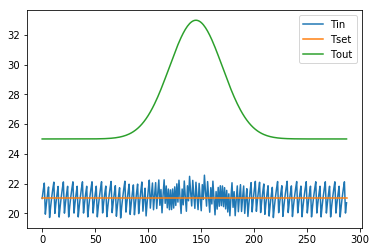

In [42]:
df_res_brain = pd.DataFrame(results)
df_res_brain.plot()
print('RMSE:', np.sqrt(np.sum(np.power(df_res_brain['Tin'].values-df_res_brain['Tset'].values,2))/df_res_brain.shape[0]))

In [44]:
def rule_based_policy(Tin, Tset, threshold=0.9):
    if Tset > Tin:
        return 0

    elif abs(Tset-Tin) > threshold:
        return 1

    else:
        return 0

RMSE: 0.8881715580145456


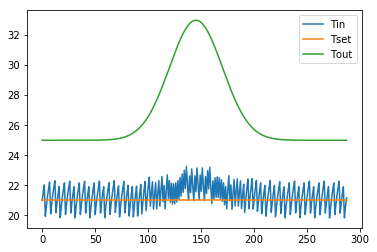

In [45]:
house = House(K=0.5, C=0.3, Qhvac=9, Tin_initial=21)
timestep = 5
results = {'Tin':[], 'Tset':[], 'Tout': []}
for episode in range(1):
    house.setup_schedule(
        timestep=timestep,
        custom_t_out=custom_t_out.tolist(),
        schedule_index=2,
        t_set_day=21,
        t_set_night=21
        )

    for i in range(house.max_iterations):
        results['Tin'].append(house.Tin)
        results['Tset'].append(house.Tset)
        results['Tout'].append(house.Tout)
        action = rule_based_policy(house.Tin, house.Tset,0.9)
        house.update_hvacON(action)
        house.update_Tin()

df_res = pd.DataFrame(results)
df_res.plot()
print('RMSE:', np.sqrt(np.sum(np.power(df_res['Tin'].values-df_res['Tset'].values,2))/df_res.shape[0]))